<a href="https://colab.research.google.com/github/Sumanta1706/Wine/blob/main/Wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to predict wine-class (wine data) using a keras deep learning model

In [1]:
print(format('How to predict wine-class (wine data) using a keras deep learning model','*^88'))

********How to predict wine-class (wine data) using a keras deep learning model*********


In [2]:
import warnings
warnings.filterwarnings("ignore")

*Loading all the necessary libraries*

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
#from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt    

In [4]:
import time
start_time = time.time()

*Setting up the parameters*

In [5]:
NB_CLASSES = 3
VALIDATION_SPLIT = 0.2
VERBOSE = 1
BATCH_SIZE = 128

*Loading the dataset*

In [6]:
iris = datasets.load_wine()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Preprocess The X Data By Scaling*

In [7]:
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

*Apply the scaler to the X training data*

In [8]:
X_train_std = sc.transform(X_train)

*Apply the SAME scaler to the X test data*

In [9]:
X_test_std = sc.transform(X_test)

Apply the same scaler to the X test dataset, and converting the class vectors to binary class metrices

In [ ]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test  = np_utils.to_categorical(y_test, NB_CLASSES)

###Setting up the deep learning model###

In [11]:
accuracy = []
#for OPTIMIZER in [SGD(), RMSprop(), Adam()]:
for OPTIMIZER in [Adam()]: 
    for NB_EPOCH in [5]:
        for N_Units_in_Multiple_Layers in [64, 128, 256]:
            model = Sequential()
            model.add(Dense(units = N_Units_in_Multiple_Layers, input_shape=(X_train.shape[1],), 
                            kernel_regularizer=l2())) 
            model.add(Activation('relu'))
            model.add(Dense(units = N_Units_in_Multiple_Layers, kernel_regularizer=l2()))
            model.add(Activation('relu'))
            model.add(Dense(units = NB_CLASSES))
            model.add(Activation('softmax'))


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               3584      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_8 (Activation)    (None, 3)                 0         
Total params: 70,147
Trainable params: 70,147
Non-trainable params: 0
__________________________________________________

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [14]:
  model.fit(X_train_std, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                      verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
            

Epoch 1/5
1/1 [==============================] - 1s 948ms/step - loss: 3.8944 - accuracy: 0.5044 - val_loss: 3.7059 - val_accuracy: 0.6897
Epoch 2/5
1/1 [==============================] - 0s 35ms/step - loss: 3.6871 - accuracy: 0.6903 - val_loss: 3.5508 - val_accuracy: 0.8276
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 3.5021 - accuracy: 0.8230 - val_loss: 3.4105 - val_accuracy: 0.9655
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 3.3381 - accuracy: 0.9558 - val_loss: 3.2840 - val_accuracy: 0.9655
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 3.1938 - accuracy: 0.9735 - val_loss: 3.1692 - val_accuracy: 0.9310


In [15]:
score = model.evaluate(X_test_std, Y_test, verbose=VERBOSE)

2/2 [==============================] - 0s 8ms/step - loss: 3.1601 - accuracy: 0.9167


In [17]:
print()
print('Optimizers: ', OPTIMIZER)
print('Epoch Sizes: ', NB_EPOCH)            
print('Neurons or Units: ', N_Units_in_Multiple_Layers)            
print("Test score:", score[0])
print('Test accuracy:', score[1])
accuracy.append(score[1])
print()


Optimizers:  <keras.optimizer_v2.adam.Adam object at 0x7f4dff9c1050>
Epoch Sizes:  5
Neurons or Units:  256
Test score: 3.1601178646087646
Test accuracy: 0.9166666865348816



[0.9166666865348816]


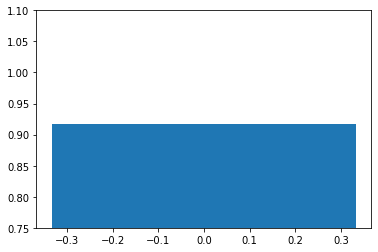

In [18]:
print(accuracy)
y = accuracy; N = len(y); x = range(N); width = 1./1.5;
plt.ylim(0.75,1.1)
plt.bar(x,y,width); plt.show()

In [19]:
print()
print("Execution Time %s seconds: " % (time.time() - start_time)) 


Execution Time 281.028520822525 seconds: 


In [20]:
import pandas as pd

test_data = pd.read_excel('wine_excel.xlsx', header=None)
test_data = test_data.transpose()   #### Transposing the excel data

test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Attribute\Wine sample,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,CAT PREDICTION
1,1,11.4722,3.83219,2.25229,10.1414,114.437,2.29147,2.16888,2.53561,1.43301,6.93169,1.37229,2.1376,745.92,NaN
2,2,11.2252,2.19536,2.18777,12.121,105.547,2.58447,2.00736,2.56314,1.86205,6.59835,1.2353,2.8443,1027.81,NaN
3,3,12.1945,1.61397,2.54119,10.3771,111.963,2.32897,2.32306,2.32061,1.09417,6.5043,2.5581,2.58015,692.632,NaN
4,4,11.5614,2.43352,2.10456,17.2986,110.329,2.236,2.19247,2.33303,1.65863,6.52543,2.25187,3.1275,1197.8,NaN
5,5,11.3208,2.62838,2.08426,18.2672,107.554,2.03639,2.01833,2.9601,1.76101,6.30784,1.03513,3.31129,1501.18,NaN
6,6,10.79,2.02949,2.59952,14.0883,100.865,2.78794,2.73867,2.35793,1.29711,6.04752,2.72767,2.95164,1228.6,NaN
7,7,11.3142,2.92099,2.2644,11.3131,105.672,2.52932,2.77085,2.47529,1.50477,6.77992,2.85008,3.51537,673.36,NaN
8,8,10.6586,2.08104,2.97305,8.45198,107.906,2.57738,2.75875,2.56783,1.21569,6.49748,1.29151,2.0144,1304.38,NaN
9,9,13.4488,1.17771,2.28377,13.7642,107.261,2.16304,2.81686,2.41259,1.30511,6.90504,1.88018,3.39265,717.438,NaN


In [21]:
test_data = test_data.drop(0, 1)  ### Drop the Attribute\Wine sample 
test_data = test_data.drop(14, 1)   ### Drop the last column. 
test_data  #### 10 samples with feature values

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,11.4722,3.83219,2.25229,10.1414,114.437,2.29147,2.16888,2.53561,1.43301,6.93169,1.37229,2.1376,745.92
2,11.2252,2.19536,2.18777,12.121,105.547,2.58447,2.00736,2.56314,1.86205,6.59835,1.2353,2.8443,1027.81
3,12.1945,1.61397,2.54119,10.3771,111.963,2.32897,2.32306,2.32061,1.09417,6.5043,2.5581,2.58015,692.632
4,11.5614,2.43352,2.10456,17.2986,110.329,2.236,2.19247,2.33303,1.65863,6.52543,2.25187,3.1275,1197.8
5,11.3208,2.62838,2.08426,18.2672,107.554,2.03639,2.01833,2.9601,1.76101,6.30784,1.03513,3.31129,1501.18
6,10.79,2.02949,2.59952,14.0883,100.865,2.78794,2.73867,2.35793,1.29711,6.04752,2.72767,2.95164,1228.6
7,11.3142,2.92099,2.2644,11.3131,105.672,2.52932,2.77085,2.47529,1.50477,6.77992,2.85008,3.51537,673.36
8,10.6586,2.08104,2.97305,8.45198,107.906,2.57738,2.75875,2.56783,1.21569,6.49748,1.29151,2.0144,1304.38
9,13.4488,1.17771,2.28377,13.7642,107.261,2.16304,2.81686,2.41259,1.30511,6.90504,1.88018,3.39265,717.438


In [22]:
test_data = test_data.drop(labels=[0], axis=0)  #### dropping the header

In [23]:
import numpy as np

In [24]:
test_data = np.asarray(test_data).astype(np.float32)

In [25]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler(with_mean=True, with_std=True)
#sc.fit(X_train)
test_data = sc.transform(test_data) 

In [26]:
predictions = model.predict(test_data)     #### Predict using the trained model 
print(predictions)    
y_classes = predictions.argmax(axis=-1)
y_classes 
i = 1
for x in y_classes:
  print('For sample %d , the class is %s ' % (i, x))      #### printing the classes 
  #print ("Sample %i predicted class is {} " % (i,x))

  i =i +1

[[0.02529438 0.907543   0.06716266]
 [0.02733117 0.89614606 0.0765227 ]
 [0.07597607 0.90478724 0.01923661]
 [0.05502183 0.91894925 0.02602889]
 [0.01282273 0.9213169  0.06586041]
 [0.08187771 0.90721923 0.01090307]
 [0.05536588 0.93670684 0.00792721]
 [0.03389404 0.90657926 0.05952663]
 [0.05511729 0.8992683  0.04561444]
 [0.0498189  0.9349252  0.0152559 ]]
For sample 1 , the class is 1 
For sample 2 , the class is 1 
For sample 3 , the class is 1 
For sample 4 , the class is 1 
For sample 5 , the class is 1 
For sample 6 , the class is 1 
For sample 7 , the class is 1 
For sample 8 , the class is 1 
For sample 9 , the class is 1 
For sample 10 , the class is 1 
